# [Industrial Data Science for Batch Manufacturing Processes](https://arxiv.org/abs/2209.09660)

*Imanol Arzac-Garmendia, Mattia Vallerio, Carlos Perez-Galvan, Francisco J. Navarro-Brull*

Batch processes show several sources of variability, from raw materials' properties to initial and evolving conditions that change during the different events in the manufacturing process. In this chapter, we will illustrate with an industrial example how to use machine learning to reduce this apparent excess of data while maintaining the relevant information for process engineers. Two common use cases will be presented: 1) AutoML analysis to quickly find correlations in batch process data, and 2) trajectory analysis to monitor and identify anomalous batches leading to process control improvements
#


**Authors (code under BSD-3): Ben Katz, Carlos Perez, Francisco Navarro**

In [1]:
%pip install pca

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pca
import datetime

In [4]:
#read data from repository
data = pd.read_csv(r'https://raw.githubusercontent.com/industrial-data/predictor-explainer/main/data/dryer_dataset_imanol_et_al_2022.csv')

In [5]:
#create data table with durations of batches and merge it to the original data table by batch ID
data = data.merge(data.groupby('BatchID').max()['Batch index'].rename('Batch duration [min]'),on = 'BatchID')
#create new colum with batch number identifier in string format
data['BatchID (string)'] = ['Batch ' + str(ID) for ID in data['BatchID']]
data['TS'] = data['TS'].map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %I:%M:%S %p'))

In [6]:
#subset of data to show in examle BatchID between 10 and 20
example_data = data[(data['BatchID'] >= 10) & (data['BatchID'] < 20)]

In [7]:
example_data.columns

Index(['TS', 'Date[TS]', 'Month Year[TS]', 'Batch number', 'BatchID',
       'Batch time [h:min]', 'Total batch duration', 'Batch index',
       'Batch starts', 'Batch ends', 'BatchID (#)', 'Phase', 'Batch-Phase',
       'PhaseID', 'Phase time [h:min]', 'Total phase duration [h:min]',
       'PhaseID (#)', 'Aligned phase index', 'Phase index', 'Phase starts',
       'Phase ends', 'Y (Final solvent concentration) [%]', 'Selected',
       'Quality', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Tank level [%]', 'Differential pressure [mmHg]',
       'Dryer pressure [mmHg]', 'Power [W]', 'Agitator Speed [rpm]',
       'Torque [Nm]', 'Jacket Temp SP [degC]', 'Jacket Temp PV  [degC]',
       'abs(Jacket Temp SP-PV)  [degC]', 'Dryer Temp SP [degC]',
       'Dryer Temp PV [degC]', 'abs(Dryer Temp SP-PV)  [degC]', 'Z1', 'Z2',
       'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11',
       'Z (Initial cake weight) [kg]', 'Level1', 'Temp1', 'Temp2', 'Time4',
 

In [8]:
#time series of 10 batches in plotly. Target (final concentration), colored by batch
fig = px.scatter(example_data,x = "TS", y ='Y (Final solvent concentration) [%]', color = 'BatchID (string)' )
fig.show()

In [9]:
#time series of 10 batches in plotly. Target (final concentration), colored by batch
fig = px.scatter(example_data,x = "TS", y ='Z (Initial cake weight) [kg]', color = 'BatchID (string)' )
fig.show()

In [10]:
#time series of 10 batches in plotly. Target (final concentration), colored by batch
fig = px.scatter(example_data,x = "TS", y ='Dryer Temp PV [degC]', color = 'BatchID (string)' )
fig.show()

In [11]:
#time series of 10 batches in plotly. Target (final concentration), colored by batch
fig = px.scatter(example_data,x = "TS", y ='PhaseID', color = 'BatchID (string)' )
fig.show()

In [12]:
#time series of 10 batches in plotly. Target (final concentration), colored by batch
fig = px.scatter(example_data,x = "TS", y ='BatchID', color = 'BatchID (string)' )
fig.show()

[Text(1, 0.0, '2021-08-07'),
 Text(1, 1.0, '2021-08-08'),
 Text(1, 2.0, '2021-08-09'),
 Text(1, 3.0, '2021-08-10'),
 Text(1, 4.0, '2021-08-11'),
 Text(1, 5.0, '2021-08-12'),
 Text(1, 6.0, '2021-08-13')]

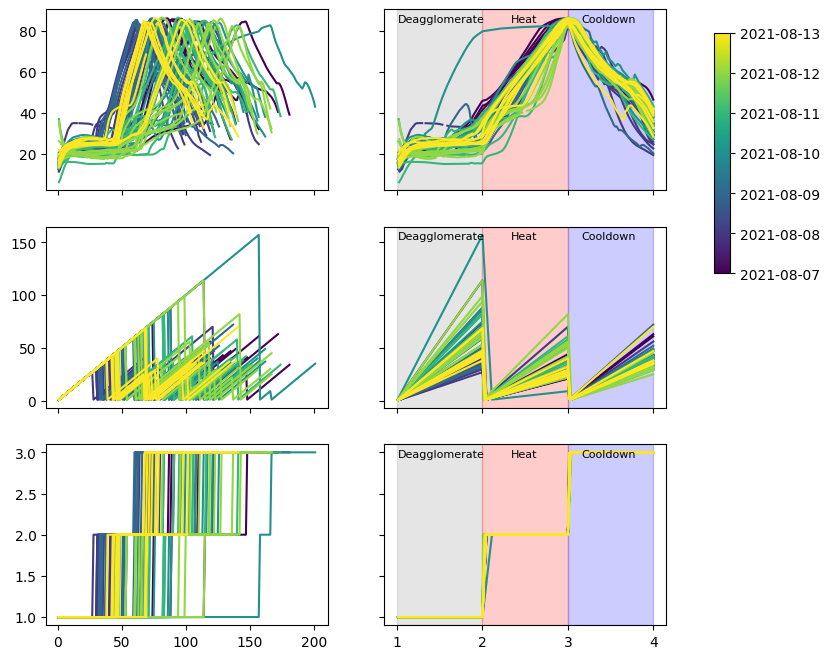

In [13]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
dates = data['Date[TS]'].unique()
normalize = mcolors.Normalize(vmin=0, vmax=len(dates)-1)
colormap = cm.viridis
date_dict = dict(zip(dates,np.arange(0,len(dates))))

#function to get color from colormap according to normalization in chronological order
def get_color(batch_start_date):
  return colormap(normalize(date_dict[batch_start_date]))

#figure parameters
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey = 'row',
                                    figsize=(8, 8))

#iterate over all batches to plot them and color them according to date
for ID in set(data['BatchID']):
  batch = data[data['BatchID'] == ID]
  color = get_color(batch['Date[TS]'].iloc[0])
  axes[0,0].plot(batch[ 'Batch index'],batch['Dryer Temp PV [degC]'], c = color)
  axes[0,1].plot(batch['Aligned phase index'],batch['Dryer Temp PV [degC]'], c = color)
  axes[1,0].plot(batch[ 'Batch index'],batch[ 'Phase index'], c = color)
  axes[1,1].plot(batch['Aligned phase index'],batch['Phase index'], c = color)
  axes[2,0].plot(batch[ 'Batch index'],batch['PhaseID (#)'], c = color)
  axes[2,1].plot(batch['Aligned phase index'],batch['PhaseID (#)'], c = color)
#ax0.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Batch number')
#plt.sca(axes[1,0])
#plt.xticks(np.arange(0,len(example_data['BatchID']), len(example_data['BatchID'])//3), rotation = 45, ha = 'right')

#add names per phase and colored regions to the right hand side plots
for i in range(3):
  axes[i,1].text(.05, 0.93, 'Deagglomerate', transform=axes[i,1].transAxes,fontsize = 8)
  axes[i,1].text(.45, 0.93, 'Heat', transform=axes[i,1].transAxes,fontsize = 8)
  axes[i,1].text(.7, 0.93, 'Cooldown', transform=axes[i,1].transAxes,fontsize = 8)
  axes[i,1].axvspan(1,2, alpha = .2, color='gray')
  axes[i,1].axvspan(2,3, alpha = .2, color='red')
  axes[i,1].axvspan(3,4, alpha = .2, color='blue')

#add colormap legend according to dates
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3]) # add a small custom axis
plt.colorbar(scalarmappaple, cax = sub_ax)
sub_ax.set_yticklabels(dates)

In [14]:
#subset of data for batches longer than 2:30 and shorter than 1:50
long_short_batches = data[(data['Total batch duration'] > '2:30') | (data['Total batch duration'] < '1:50')]

In [15]:
'2:30'

'2:30'

Text(-0.2, 1.1, 'Batch Duration (minutes)')

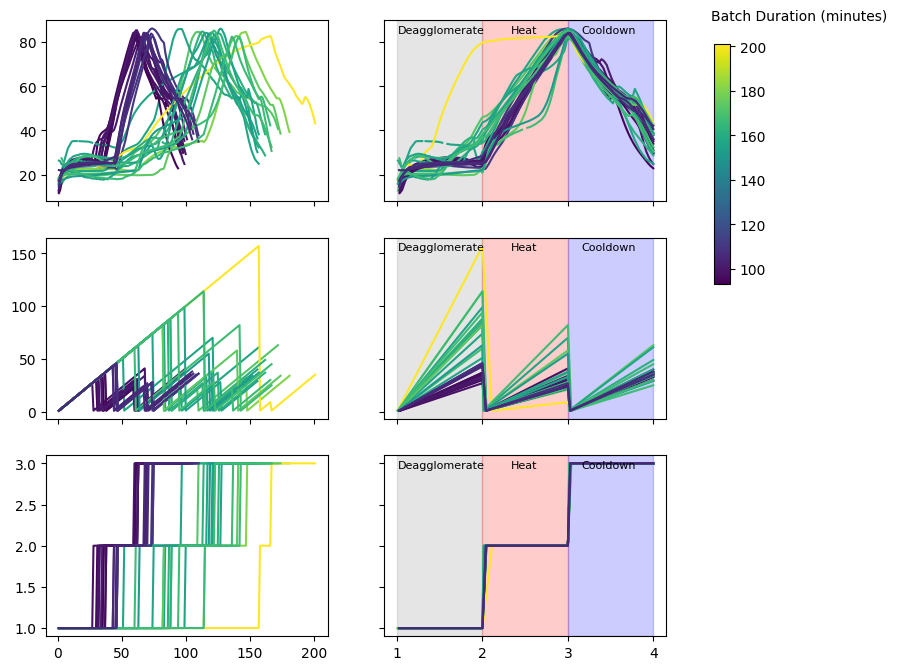

In [16]:
#create color normalization with example data using batch index
normalize = mcolors.Normalize(example_data.groupby('BatchID').max()['Batch index'].min(), vmax=data['Batch index'].max())
colormap = cm.viridis

#function to return color by duration
def get_color_by_duration(duration):
  return colormap(normalize(duration))
#figure parameters
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey = 'row',
                                    figsize=(8, 8))
#iterate over subset of long or short batches to plot them and color them according to their duration
for ID in set(long_short_batches['BatchID']):
  batch = long_short_batches[long_short_batches['BatchID'] == ID]
  color = get_color_by_duration(batch['Batch index'].max())
  axes[0,0].plot(batch[ 'Batch index'],batch['Dryer Temp PV [degC]'], c = color)
  axes[0,1].plot(batch['Aligned phase index'],batch['Dryer Temp PV [degC]'], c = color)
  axes[1,0].plot(batch[ 'Batch index'],batch[ 'Phase index'], c = color)
  axes[1,1].plot(batch['Aligned phase index'],batch['Phase index'], c = color)
  axes[2,0].plot(batch[ 'Batch index'],batch['PhaseID (#)'], c = color)
  axes[2,1].plot(batch['Aligned phase index'],batch['PhaseID (#)'], c = color)
#ax0.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Batch number')
#plt.sca(axes[1,0])
#plt.xticks(np.arange(0,len(example_data['BatchID']), len(example_data['BatchID'])//3), rotation = 45, ha = 'right')

#add names per phase and colored regions to the right hand side plots
for i in range(3):
  axes[i,1].text(.05, 0.93, 'Deagglomerate', transform=axes[i,1].transAxes,fontsize = 8)
  axes[i,1].text(.45, 0.93, 'Heat', transform=axes[i,1].transAxes,fontsize = 8)
  axes[i,1].text(.7, 0.93, 'Cooldown', transform=axes[i,1].transAxes,fontsize = 8)
  axes[i,1].axvspan(1,2, alpha = .2, color='gray')
  axes[i,1].axvspan(2,3, alpha = .2, color='red')
  axes[i,1].axvspan(3,4, alpha = .2, color='blue')

#add colormap legend according to dates
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3]) # add a small custom axis
plt.colorbar(scalarmappaple, cax = sub_ax)
sub_ax.text(-.2,1.1,'Batch Duration (minutes)', transform = sub_ax.transAxes)
#labels = ['1:30','1:40','1:50','2:00','2:10','2:20','2:30','2:40','2:50',]
#sub_ax.set_yticks(np.arange(90,180,10))
#sub_ax.set_yticklabels(labels)

In [17]:
date_dict

{'2021-08-07': 0,
 '2021-08-08': 1,
 '2021-08-09': 2,
 '2021-08-10': 3,
 '2021-08-11': 4,
 '2021-08-12': 5,
 '2021-08-13': 6}

In [18]:
data['Date[TS]'].unique()

array(['2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10',
       '2021-08-11', '2021-08-12', '2021-08-13'], dtype=object)

In [19]:
np.arange(0,len(dates))

array([0, 1, 2, 3, 4, 5, 6])

In [20]:
selected_columns = ['BatchID',
       'PhaseID','Tank level [%]', 'Differential pressure [mmHg]',
       'Dryer pressure [mmHg]', 'Power [W]', 'Agitator Speed [rpm]',
       'Torque [Nm]', 'Jacket Temp SP [degC]', 'Jacket Temp PV  [degC]',
       'abs(Jacket Temp SP-PV)  [degC]', 'Dryer Temp SP [degC]',
       'Dryer Temp PV [degC]', 'abs(Dryer Temp SP-PV)  [degC]']

In [21]:
#apply statistical aggregations to selected columns
test_data = data[selected_columns].groupby(['BatchID','PhaseID']).agg(['mean','median','min','max','sum','std']).unstack()

y_values = data[['BatchID','Y (Final solvent concentration) [%]']].groupby(['BatchID']).mean() #all Y values are the same per batch, aggregation method does not matter


In [22]:
#format column names as "aggregation of sensor, phase"
test_data.columns = test_data.columns.map('{0[1]} of {0[0]}, {0[2]}'.format)
import re
#replace non alphanumeric characters with empty
lgbm_data = test_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [23]:
lgbm_data

,meanofTanklevelCooldown,meanofTanklevelDeagglomerate,meanofTanklevelHeat,medianofTanklevelCooldown,medianofTanklevelDeagglomerate,medianofTanklevelHeat,minofTanklevelCooldown,minofTanklevelDeagglomerate,minofTanklevelHeat,maxofTanklevelCooldown,...,minofabsDryerTempSPPVdegCHeat,maxofabsDryerTempSPPVdegCCooldown,maxofabsDryerTempSPPVdegCDeagglomerate,maxofabsDryerTempSPPVdegCHeat,sumofabsDryerTempSPPVdegCCooldown,sumofabsDryerTempSPPVdegCDeagglomerate,sumofabsDryerTempSPPVdegCHeat,stdofabsDryerTempSPPVdegCCooldown,stdofabsDryerTempSPPVdegCDeagglomerate,stdofabsDryerTempSPPVdegCHeat
BatchID,,,,,,,,,,,,,,,,,,,,,
1,58.097756,32.465556,55.516591,58.225,35.4540,55.5170,55.491,0.0,55.481,58.253,...,1.070,58.455,65.474,57.059,1425.620,3796.488,1131.579,12.489946,10.020516,15.611013
2,65.559000,38.942338,65.090810,65.559,43.2860,65.0230,65.559,0.0,64.642,65.559,...,0.840,83.324,69.697,84.069,2612.884,3821.300,736.660,11.001650,9.746299,27.386287
3,74.991000,44.126676,74.690455,74.991,48.6535,74.6980,74.991,0.0,74.344,74.991,...,2.523,82.993,67.385,82.989,2808.052,4034.589,660.581,12.992724,10.276171,22.665984
4,84.490000,48.138943,84.286524,84.490,50.3660,84.2690,84.490,0.0,84.232,84.490,...,0.928,78.688,70.857,78.748,3400.759,5181.367,589.025,11.358939,9.016329,21.107020
5,87.398000,57.945132,84.237879,87.398,72.6855,83.1810,87.398,0.0,80.814,87.398,...,2.560,78.248,68.501,79.634,1932.155,6688.865,1105.242,11.808424,4.863312,22.848147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,82.574722,32.272105,74.985350,82.635,33.0375,77.8500,82.352,0.0,63.080,82.723,...,0.921,41.412,66.155,51.409,819.537,2287.485,1225.842,10.543516,2.583271,14.789712
68,59.002200,28.478085,55.632167,59.039,29.6750,55.4030,58.795,0.0,54.121,59.127,...,0.938,55.224,66.409,57.210,2387.198,2803.876,671.316,14.094105,9.079554,18.419521
69,54.452553,30.464395,51.425833,54.512,32.8680,51.1905,54.162,0.0,51.036,54.654,...,0.727,47.196,65.007,59.915,925.661,2590.969,688.029,12.824172,9.654204,17.936757


In [24]:
#todo: remove infinities, check distributions of fingerprints
test_data.head()


,"mean of Tank level [%], Cooldown","mean of Tank level [%], Deagglomerate","mean of Tank level [%], Heat","median of Tank level [%], Cooldown","median of Tank level [%], Deagglomerate","median of Tank level [%], Heat","min of Tank level [%], Cooldown","min of Tank level [%], Deagglomerate","min of Tank level [%], Heat","max of Tank level [%], Cooldown",...,"min of abs(Dryer Temp SP-PV) [degC], Heat","max of abs(Dryer Temp SP-PV) [degC], Cooldown","max of abs(Dryer Temp SP-PV) [degC], Deagglomerate","max of abs(Dryer Temp SP-PV) [degC], Heat","sum of abs(Dryer Temp SP-PV) [degC], Cooldown","sum of abs(Dryer Temp SP-PV) [degC], Deagglomerate","sum of abs(Dryer Temp SP-PV) [degC], Heat","std of abs(Dryer Temp SP-PV) [degC], Cooldown","std of abs(Dryer Temp SP-PV) [degC], Deagglomerate","std of abs(Dryer Temp SP-PV) [degC], Heat"
BatchID,,,,,,,,,,,,,,,,,,,,,
1,58.097756,32.465556,55.516591,58.225,35.4540,55.517,55.491,0.0,55.481,58.253,...,1.070,58.455,65.474,57.059,1425.620,3796.488,1131.579,12.489946,10.020516,15.611013
2,65.559000,38.942338,65.090810,65.559,43.2860,65.023,65.559,0.0,64.642,65.559,...,0.840,83.324,69.697,84.069,2612.884,3821.300,736.660,11.001650,9.746299,27.386287
3,74.991000,44.126676,74.690455,74.991,48.6535,74.698,74.991,0.0,74.344,74.991,...,2.523,82.993,67.385,82.989,2808.052,4034.589,660.581,12.992724,10.276171,22.665984
4,84.490000,48.138943,84.286524,84.490,50.3660,84.269,84.490,0.0,84.232,84.490,...,0.928,78.688,70.857,78.748,3400.759,5181.367,589.025,11.358939,9.016329,21.107020
5,87.398000,57.945132,84.237879,87.398,72.6855,83.181,87.398,0.0,80.814,87.398,...,2.560,78.248,68.501,79.634,1932.155,6688.865,1105.242,11.808424,4.863312,22.848147


([<matplotlib.axis.XTick at 0x7db51c373ac0>,
 [Text(0, 0, '1970-01-01'),
  Text(97, 0, '1970-04-08'),
  Text(194, 0, '1970-07-14'),
  Text(291, 0, '1970-10-19')])

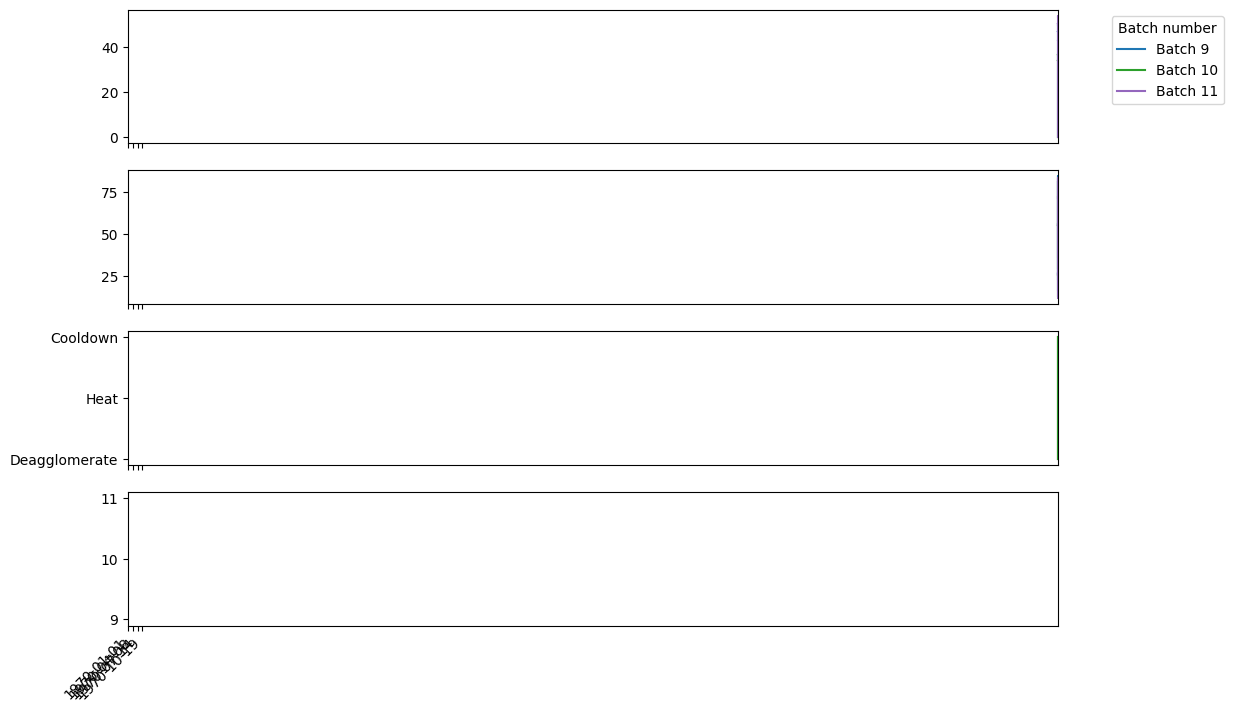

In [25]:
#visualization example of fingerprints
example_data = data[(data['BatchID'] >= 9) & (data['BatchID'] < 12)]
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True,
                                    figsize=(12, 8))
for ID in set(example_data['BatchID']):
  batch = example_data[example_data['BatchID'] == ID]
  axes[0].plot(batch['TS'],batch['Tank level [%]'], label = 'Batch ' + str(ID))
  axes[0].plot(batch['TS'],test_data.loc[ID,['max of Tank level [%], Deagglomerate']][0]*np.ones(batch['TS'].shape[0]))
  axes[1].plot(batch['TS'],batch[ 'Dryer Temp PV [degC]'], label = 'Batch ' + str(ID))
  axes[1].plot(batch['TS'],test_data.loc[ID,['max of Dryer Temp PV [degC], Heat']][0]*np.ones(batch['TS'].shape[0]))
  axes[2].plot(batch['TS'],batch['PhaseID'], label = 'Batch ' + str(ID))
  axes[3].plot(batch['TS'],batch['BatchID'], label = 'Batch ' + str(ID))
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Batch number')
plt.xticks(np.arange(0,len(example_data['BatchID']), len(example_data['BatchID'])//3), rotation = 45, ha = 'right')

In [26]:
#time losses
import plotly.express as px
plot_data = data.groupby(['BatchID','PhaseID']).max()['Phase index'].rename('Phase duration [min]').reset_index()
fig = px.bar(plot_data, x="BatchID", y="Phase duration [min]", color="PhaseID", category_orders = {'PhaseID':['Deagglomerate','Heat','Cooldown']})
fig.show()

In [27]:
#distribution of phase duration by phase
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = px.violin(plot_data, x="PhaseID", y="Phase duration [min]", color="PhaseID", box= True,points = 'all', category_orders = {'PhaseID':['Deagglomerate','Heat','Cooldown']})

fig.show()

In [28]:
#final solent concentration colored by spec
plot_data = data.groupby(['BatchID','PhaseID']).max()['Y (Final solvent concentration) [%]'].reset_index()
plot_data['label'] = ['Off-spec' if ID <= 32 else 'On-spec' if ID < 62 else 'High-solvent' for ID in plot_data['BatchID']]
fig = px.line(plot_data,x='BatchID',y = 'Y (Final solvent concentration) [%]', markers = True, color = 'label' )
fig.show()

In [29]:
#distribution of final solvent concentration by spec
fig = px.box(plot_data,y = 'Y (Final solvent concentration) [%]', points = 'all', color = 'label')
fig.show()

In [30]:
plot_data

,BatchID,PhaseID,Y (Final solvent concentration) [%],label
0,1,Cooldown,4.98,Off-spec
1,1,Deagglomerate,4.98,Off-spec
2,1,Heat,4.98,Off-spec
3,2,Cooldown,4.77,Off-spec
4,2,Deagglomerate,4.77,Off-spec
...,...,...,...,...
208,70,Deagglomerate,5.42,High-solvent
209,70,Heat,5.42,High-solvent
210,71,Cooldown,5.28,High-solvent
211,71,Deagglomerate,5.28,High-solvent


In [31]:
plot_data = data.groupby(['BatchID','PhaseID']).max()['Phase index'].rename('Phase duration [min]')
plot_data.reset_index()

,BatchID,PhaseID,Phase duration [min]
0,1,Cooldown,41
1,1,Deagglomerate,63
2,1,Heat,44
3,2,Cooldown,43
4,2,Deagglomerate,65
...,...,...,...
208,70,Deagglomerate,42
209,70,Heat,25
210,71,Cooldown,36
211,71,Deagglomerate,47


In [32]:
test_data.loc[ID,['max of Tank level [%], Deagglomerate']][0]

45.742

In [33]:
#gradient boost on final solvent concentration
from lightgbm import LGBMRegressor
clf = LGBMRegressor()
clf.fit(lgbm_data,y_values['Y (Final solvent concentration) [%]'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5083
[LightGBM] [Info] Number of data points in the train set: 71, number of used features: 214
[LightGBM] [Info] Start training from score 4.796479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor()

In [34]:
top_10_idx = np.argsort(clf.feature_importances_)[-10:]

In [35]:
test_data.columns[top_10_idx]

Index(['max of Dryer pressure [mmHg], Deagglomerate',
       'sum of Dryer Temp SP [degC], Cooldown', 'std of Tank level [%], Heat',
       'mean of Jacket Temp PV  [degC], Deagglomerate',
       'min of Dryer pressure [mmHg], Cooldown',
       'sum of Torque [Nm], Cooldown',
       'median of Dryer Temp SP [degC], Deagglomerate',
       'mean of Agitator Speed [rpm], Deagglomerate',
       'median of Dryer pressure [mmHg], Cooldown',
       'median of Dryer Temp PV [degC], Deagglomerate'],
      dtype='object')

In [36]:
#contributions of features towards target
fig = px.bar(test_data.columns[top_10_idx],y= test_data.columns[top_10_idx], x = clf.feature_importances_[top_10_idx], orientation = 'h')
fig.show()
#plt.bar(test_data.columns[top_10_idx], clf.feature_importances_[top_10_idx])
#plt.xticks(rotation=45, ha = 'right')

Text(-0.2, 1.1, 'Y (Final solvent concentration) [%]')

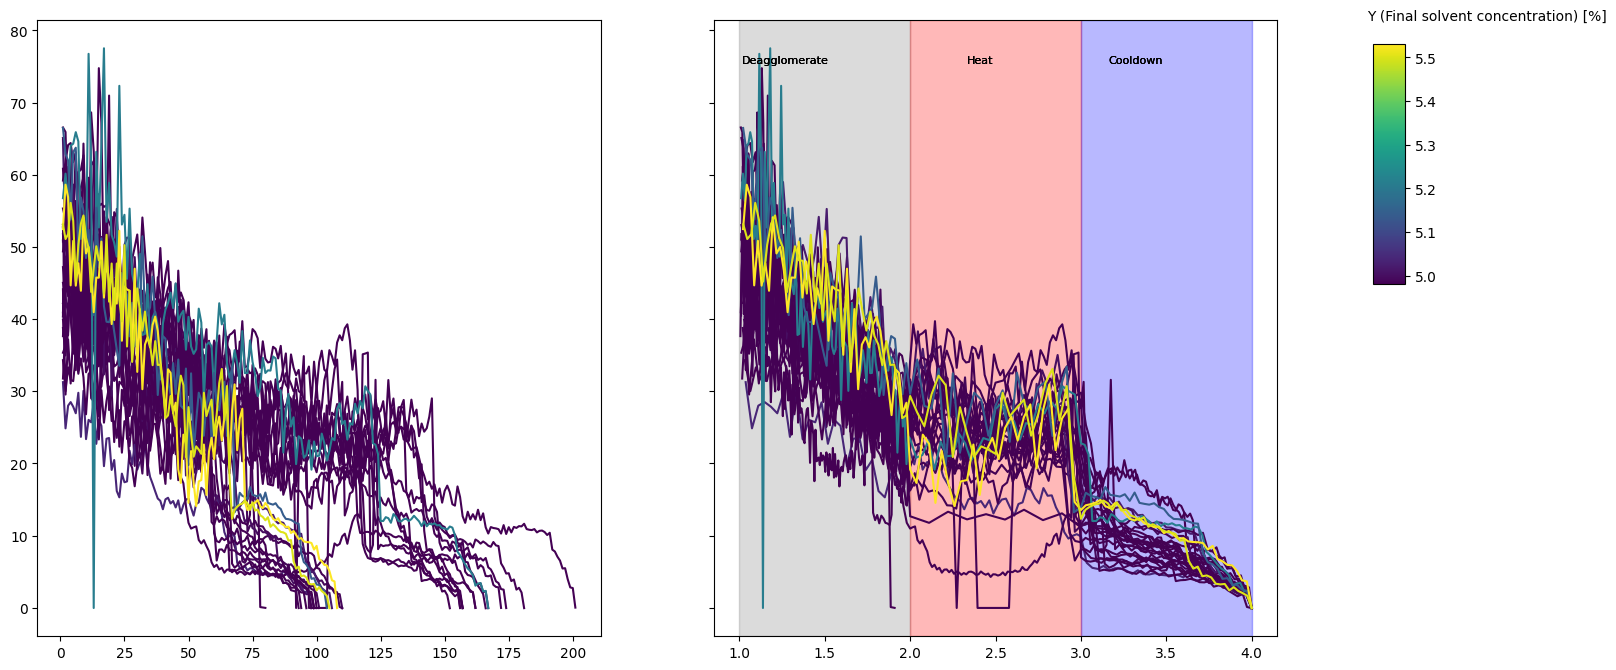

In [37]:
normalize = mcolors.Normalize(example_data.groupby('BatchID').max()['Y (Final solvent concentration) [%]'].min(), vmax=data['Y (Final solvent concentration) [%]'].max())
colormap = cm.viridis

def get_color_by_solvent(solvent):
  return colormap(normalize(solvent))

#figure configuration
fig, axes = plt.subplots(nrows=1, ncols=2, sharex='col', sharey = 'row',
                                    figsize=(16, 8))
#Iterate over batches to plot unaligned and aligned torque colored by final solvent concentration
for ID in set(long_short_batches['BatchID']):
  batch = data[data['BatchID'] == ID]
  color = get_color_by_solvent(batch['Y (Final solvent concentration) [%]'].max())
  axes[0].plot(batch[ 'Batch index'],batch['Torque [Nm]'], c = color)
  axes[1].plot(batch['Aligned phase index'],batch['Torque [Nm]'], c = color)
#ax0.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Batch number')
#plt.sca(axes[1,0])
#plt.xticks(np.arange(0,len(example_data['BatchID']), len(example_data['BatchID'])//3), rotation = 45, ha = 'right')

#add color shade to right hand side plot to indicate phases
for i in range(3):
  axes[1].text(.05, 0.93, 'Deagglomerate', transform=axes[1].transAxes,fontsize = 8)
  axes[1].text(.45, 0.93, 'Heat', transform=axes[1].transAxes,fontsize = 8)
  axes[1].text(.7, 0.93, 'Cooldown', transform=axes[1].transAxes,fontsize = 8)
  axes[1].axvspan(1,2, alpha = .1, color='gray')
  axes[1].axvspan(2,3, alpha = .1, color='red')
  axes[1].axvspan(3,4, alpha = .1, color='blue')
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3]) # add a small custom axis
plt.colorbar(scalarmappaple, cax = sub_ax)
sub_ax.text(-.2,1.1,'Y (Final solvent concentration) [%]', transform = sub_ax.transAxes)
#labels = ['1:30','1:40','1:50','2:00','2:10','2:20','2:30','2:40','2:50',]
#sub_ax.set_yticks(np.arange(90,180,10))
#sub_ax.set_yticklabels(labels)

In [38]:
test_data

,"mean of Tank level [%], Cooldown","mean of Tank level [%], Deagglomerate","mean of Tank level [%], Heat","median of Tank level [%], Cooldown","median of Tank level [%], Deagglomerate","median of Tank level [%], Heat","min of Tank level [%], Cooldown","min of Tank level [%], Deagglomerate","min of Tank level [%], Heat","max of Tank level [%], Cooldown",...,"min of abs(Dryer Temp SP-PV) [degC], Heat","max of abs(Dryer Temp SP-PV) [degC], Cooldown","max of abs(Dryer Temp SP-PV) [degC], Deagglomerate","max of abs(Dryer Temp SP-PV) [degC], Heat","sum of abs(Dryer Temp SP-PV) [degC], Cooldown","sum of abs(Dryer Temp SP-PV) [degC], Deagglomerate","sum of abs(Dryer Temp SP-PV) [degC], Heat","std of abs(Dryer Temp SP-PV) [degC], Cooldown","std of abs(Dryer Temp SP-PV) [degC], Deagglomerate","std of abs(Dryer Temp SP-PV) [degC], Heat"
BatchID,,,,,,,,,,,,,,,,,,,,,
1,58.097756,32.465556,55.516591,58.225,35.4540,55.5170,55.491,0.0,55.481,58.253,...,1.070,58.455,65.474,57.059,1425.620,3796.488,1131.579,12.489946,10.020516,15.611013
2,65.559000,38.942338,65.090810,65.559,43.2860,65.0230,65.559,0.0,64.642,65.559,...,0.840,83.324,69.697,84.069,2612.884,3821.300,736.660,11.001650,9.746299,27.386287
3,74.991000,44.126676,74.690455,74.991,48.6535,74.6980,74.991,0.0,74.344,74.991,...,2.523,82.993,67.385,82.989,2808.052,4034.589,660.581,12.992724,10.276171,22.665984
4,84.490000,48.138943,84.286524,84.490,50.3660,84.2690,84.490,0.0,84.232,84.490,...,0.928,78.688,70.857,78.748,3400.759,5181.367,589.025,11.358939,9.016329,21.107020
5,87.398000,57.945132,84.237879,87.398,72.6855,83.1810,87.398,0.0,80.814,87.398,...,2.560,78.248,68.501,79.634,1932.155,6688.865,1105.242,11.808424,4.863312,22.848147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,82.574722,32.272105,74.985350,82.635,33.0375,77.8500,82.352,0.0,63.080,82.723,...,0.921,41.412,66.155,51.409,819.537,2287.485,1225.842,10.543516,2.583271,14.789712
68,59.002200,28.478085,55.632167,59.039,29.6750,55.4030,58.795,0.0,54.121,59.127,...,0.938,55.224,66.409,57.210,2387.198,2803.876,671.316,14.094105,9.079554,18.419521
69,54.452553,30.464395,51.425833,54.512,32.8680,51.1905,54.162,0.0,51.036,54.654,...,0.727,47.196,65.007,59.915,925.661,2590.969,688.029,12.824172,9.654204,17.936757


In [39]:
#t2 on fingerprint data
model = pca.pca(detect_outliers = ['ht2'])
results = model.fit_transform(test_data)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [216] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [216] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]


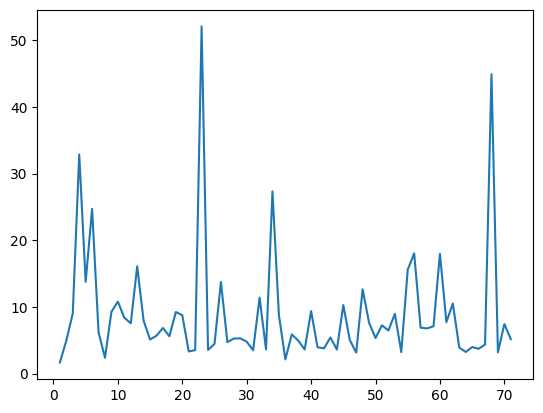

In [40]:
plt.plot(results['outliers']['y_score'])

In [41]:
results['outliers']['y_score']

1      1.654416
2      4.935047
3      9.012449
4     32.870270
5     13.756770
        ...    
67     4.329348
68    44.894153
69     3.188367
70     7.423406
71     5.149061
Name: y_score, Length: 71, dtype: float64

In [42]:
#install scikit-fda library
%pip install scikit-fda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.3/398.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.6 MB/s eta 0:00:00
  Created wheel for fdasrsf: filename=fdasrsf-2.4.3-cp310-cp310-linux_x86_64.whl size=2142771 sha256=b10da2b9634f97b54b631b30abdaefac7e0e60c7d0b3ccd7bac75cd5754b6fe5
  Stored in directory: /root/.cache/pip/wheels/d5/ab/a1/f9c1d7c5182773a848997fb86666bb56a7d33b18ada95c36e9
Successfully built fdasrsf


In [43]:
#import scikit-fda library

import skfda
#from skfda.ml.regression import FPCARegression
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

[Text(1, 4.9, '2021-08-07'),
 Text(1, 5.0, '2021-08-08'),
 Text(1, 5.1000000000000005, '2021-08-09'),
 Text(1, 5.2, '2021-08-10'),
 Text(1, 5.300000000000001, '2021-08-11'),
 Text(1, 5.4, '2021-08-12'),
 Text(1, 5.5, '2021-08-13'),
 Text(1, 5.6000000000000005, '')]

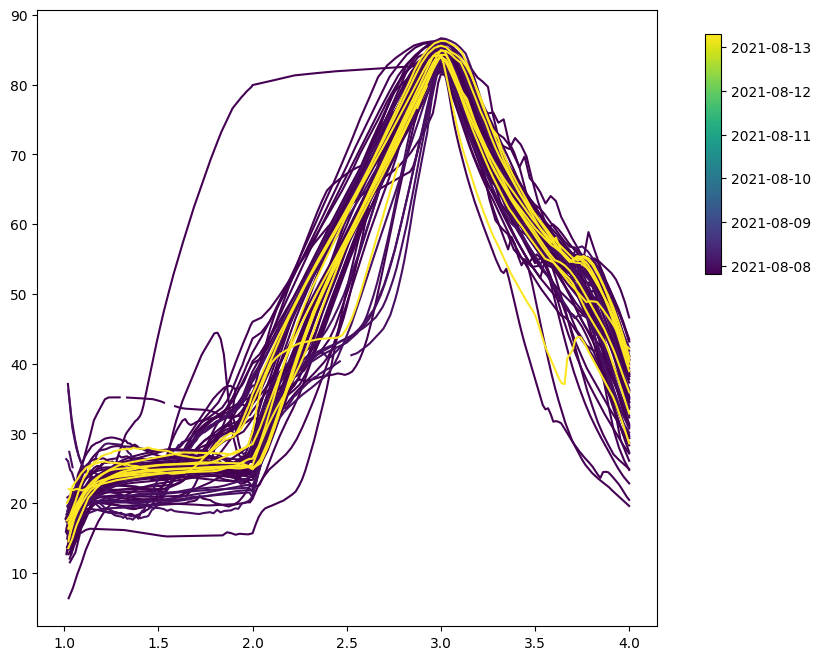

In [44]:
#plot of profile to run fpca on

fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', sharey = 'row',
                                    figsize=(8, 8))
for ID in set(data['BatchID']):
  batch = data[data['BatchID'] == ID]
  color = get_color(batch['Date[TS]'].iloc[0])
  axes.plot(batch['Aligned phase index'],batch['Dryer Temp PV [degC]'], c = color)

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3]) # add a small custom axis
plt.colorbar(scalarmappaple, cax = sub_ax)
sub_ax.set_yticklabels(dates)

In [45]:
#reference index to interpolate
base_grid = np.linspace(1, 4, 100)
#empty arrays to store each batch
data_matrix = [None]*len(set(data['BatchID']))
#iterate over each batch
for ID in set(data['BatchID']):
  batch = data[data['BatchID'] == ID]
  batch = batch.loc[:,['Aligned phase index','Dryer Temp PV [degC]']].dropna(axis=0)
  data_matrix[ID-1] = np.interp(base_grid, batch.loc[:,['Aligned phase index']].to_numpy().transpose()[0], batch.loc[:,['Dryer Temp PV [degC]']].to_numpy().transpose()[0])

In [46]:
#format of input data
fd = skfda.FDataGrid(
    data_matrix=np.array(data_matrix),
    grid_points=base_grid,
)

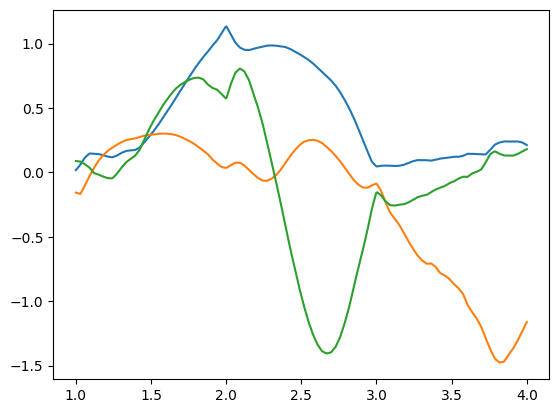

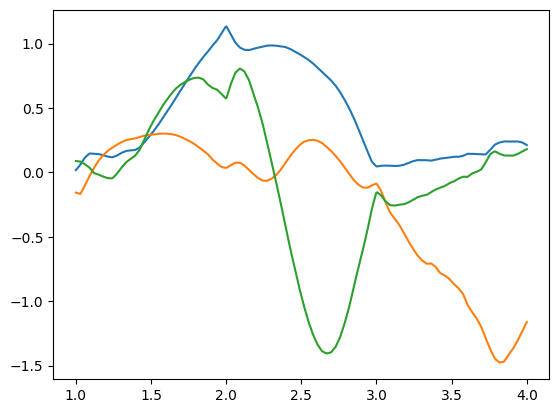

In [47]:
#direct fpca on discretized data
fpca_discretized = FPCA(n_components=3)
fpca_discretized.fit(fd)
fpca_discretized.components_.plot()

In [48]:
#reference index to interpolate
base_grid = np.linspace(1, 4, 100)
#empty arrays to store each batch
data_matrix_tank_level = [None]*len(set(data['BatchID']))
#iterate over each batch
for ID in set(data['BatchID']):
  batch = data[data['BatchID'] == ID]
  batch = batch.loc[:,['Aligned phase index','Tank level [%]']].dropna(axis=0)
  data_matrix_tank_level[ID-1] = np.interp(base_grid, batch.loc[:,['Aligned phase index']].to_numpy().transpose()[0], batch.loc[:,['Tank level [%]']].to_numpy().transpose()[0])

In [49]:
#format of input data
fd_tank_level = skfda.FDataGrid(
    data_matrix=np.array(data_matrix_tank_level),
    grid_points=base_grid,
)

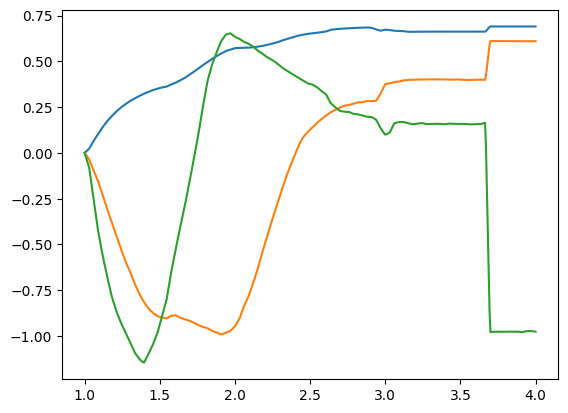

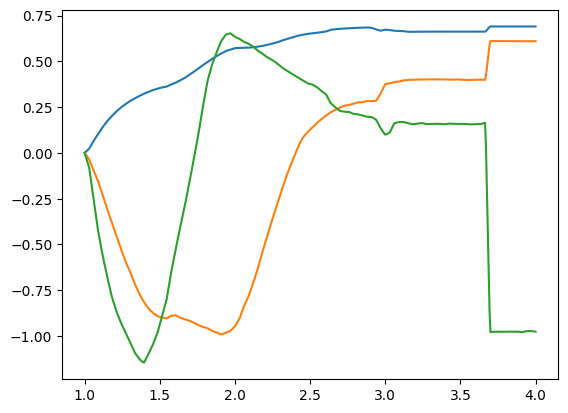

In [50]:
#direct fpca on discretized data
fpca_discretized_tank_level = FPCA(n_components=3)
fpca_discretized_tank_level.fit(fd_tank_level)
fpca_discretized_tank_level.components_.plot()

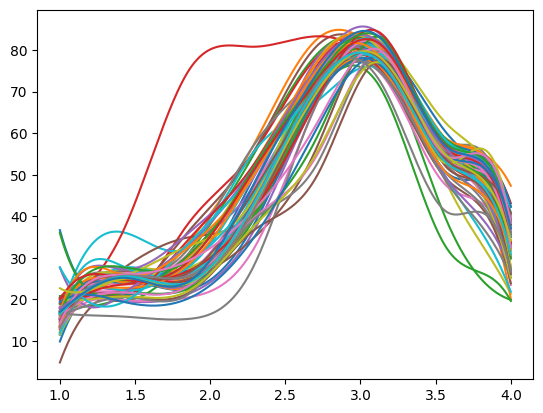

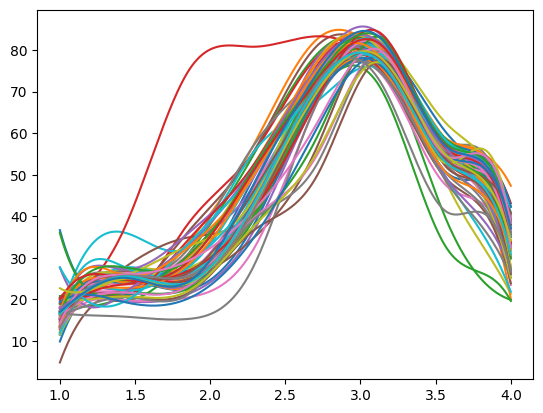

In [51]:
#fpca on data representation (e.g. b spline)
basis = skfda.representation.basis.BSplineBasis(n_basis=10)
basis_fd = fd.to_basis(basis)
basis_fd.plot()

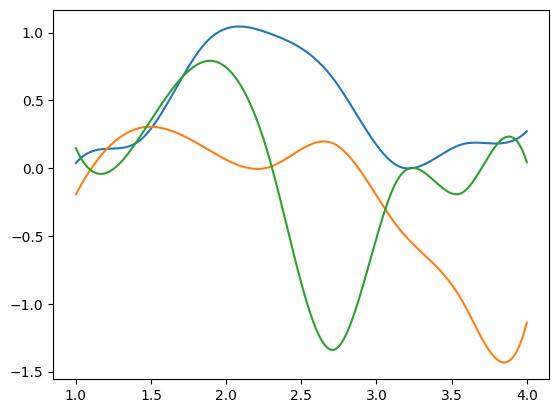

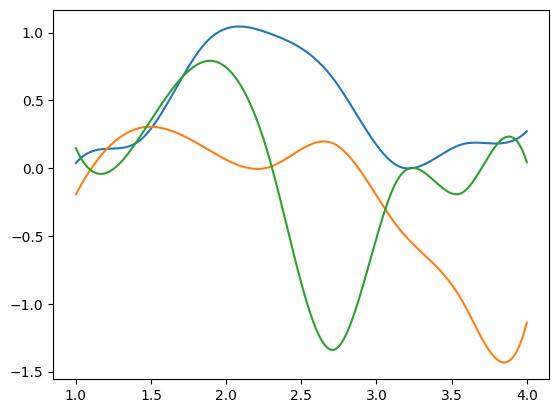

In [52]:
#functions corresponding to first 3 functional principal components
fpca = FPCA(n_components=3)
fpca.fit(basis_fd)
fpca.components_.plot()

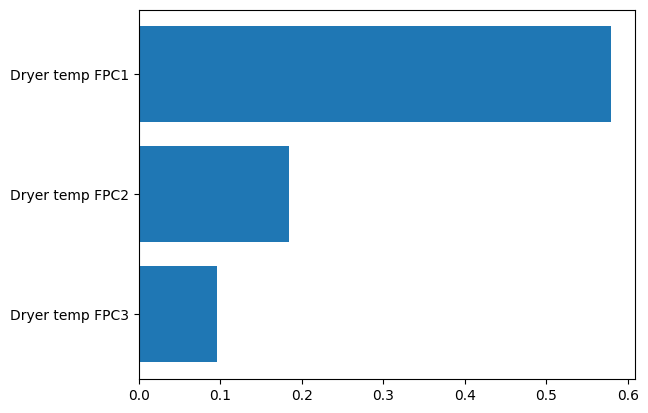

In [53]:
#contributions of fpcas to describe Dryer temp profile
bars = ('Dryer temp FPC1','Dryer temp FPC2','Dryer temp FPC3')
y_pos = np.arange(len(bars))
fig, ax = plt.subplots()
ax.barh(y_pos, fpca_discretized.explained_variance_ratio_)
ax.set_yticks(y_pos, bars)
ax.invert_yaxis()  # labels read top-to-bottom
plt.show()

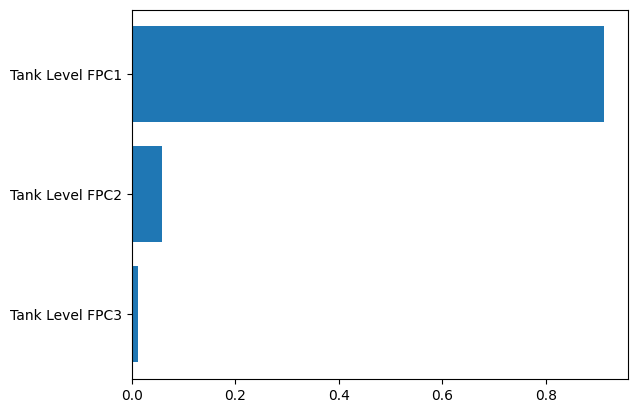

In [54]:
#contributions of fpcas to describe tank level profile
bars = ('Tank Level FPC1','Tank Level FPC2','Tank Level FPC3')
y_pos = np.arange(len(bars))
fig, ax = plt.subplots()
ax.barh(y_pos, fpca_discretized_tank_level.explained_variance_ratio_)
ax.set_yticks(y_pos, bars)
ax.invert_yaxis()  # labels read top-to-bottom
plt.show()

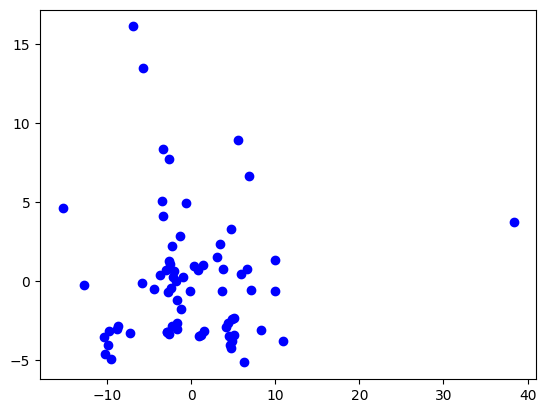

In [55]:
#score plot fpc 1 vs fpc 2, dryer temp
plt.plot(fpca_discretized.transform(fd)[:,0],fpca_discretized.transform(fd)[:,1], 'bo')

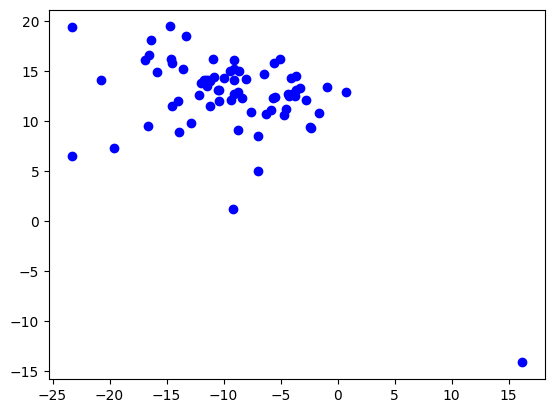

In [56]:
#score plot fpc 1 vs fpc 2, tank level
plt.plot(fpca_discretized_tank_level.transform(fd)[:,0],fpca_discretized_tank_level.transform(fd)[:,1], 'bo')

In [57]:
#from skfda.inference.hotelling import hotelling_t2
#from skfda.inference.hotelling import hotelling_test_ind

In [58]:
#fd1 = fpca_discretized.components_
#fd2 = fpca.components_

In [59]:
#hotelling_t2(fd1, fd1)

In [60]:
#t2n, pval, dist = hotelling_test_ind(fd1, fd1, return_dist=True)

In [61]:
#outliers_hot = pca.hotellingsT2(results['PC'].values, alpha=0.05)

In [62]:
#model2 = pca.pca(detect_outliers = ['ht2'])
#results2 = model2.fit_transform(fpca_discretized.transform(fd))

In [63]:
#plt.plot(results2['outliers']['y_score'])

In [64]:
#results2['outliers']['y_score'][33]

In [65]:
#t2 for fpc from dryer temp and tank level
feature_names = ['Dryer temp FPC1','Dryer temp FPC2','Dryer temp FPC3','Tank Level FPC1','Tank Level FPC2','Tank Level FPC3']
model2 = pca.pca(alpha=0.05, detect_outliers = ['ht2'])
X = pd.DataFrame(data = np.append(fpca_discretized.transform(fd),fpca_discretized_tank_level.transform(fd),axis=1), columns = feature_names)
results2 = model2.fit_transform(X, col_labels=feature_names)
#model2.plot()
#model2.biplot(legend=True, HT2=True)
#model2.scatter(legend=True, SPE=True, HT2=True)
#outliers_hot = pca.hotellingsT2(results2['PC'].values, alpha=0.05)
#outliers_hot

[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]


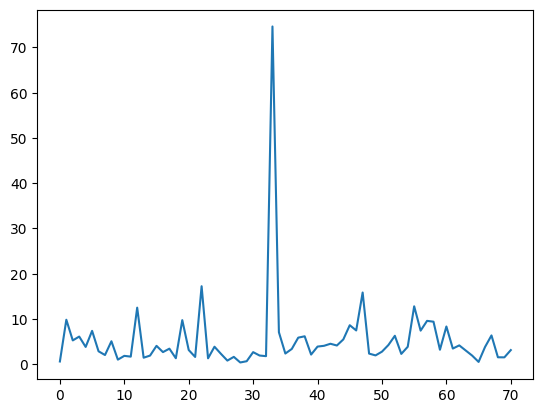

In [66]:
plt.plot(results2['outliers']['y_score'])

In [67]:
results2['loadings']

,Dryer temp FPC1,Dryer temp FPC2,Dryer temp FPC3,Tank Level FPC1,Tank Level FPC2,Tank Level FPC3
PC1,0.731418,-0.005508,0.006102,0.564757,-0.327002,0.197685
PC2,0.010306,0.727852,0.145529,-0.376083,-0.520685,0.190776
PC3,-0.050853,-0.323646,0.853469,-0.023427,-0.298169,-0.273502


In [68]:
results2['PC'].loc[33]

PC1    52.981108
PC2    10.957551
PC3    12.034878
Name: 33, dtype: float64

In [69]:
results2['outliers']['y_score']

0     0.607474
1     9.833283
2     5.261888
3     6.113160
4     3.823324
        ...   
66    3.814305
67    6.366366
68    1.536936
69    1.519184
70    3.126402
Name: y_score, Length: 71, dtype: float64

In [70]:
results2['outliers']['y_score'][33]

74.64003283780595

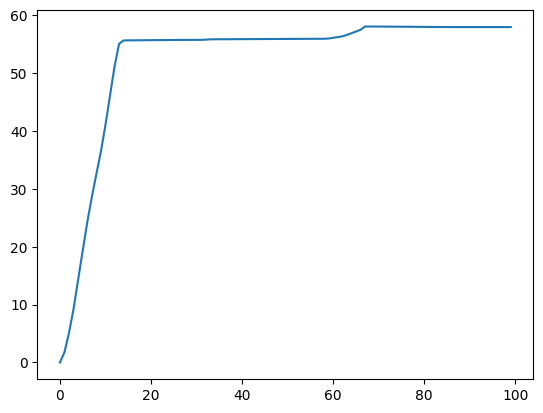

In [71]:
plt.plot(data_matrix_tank_level[33])

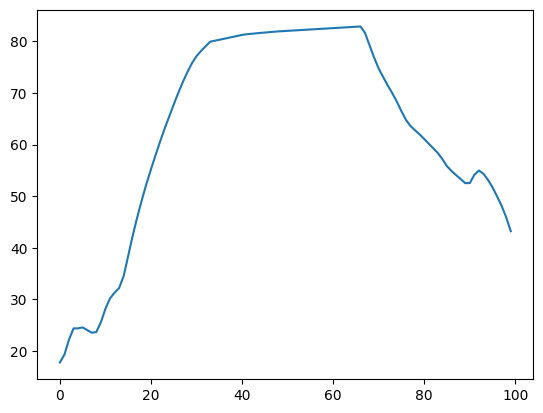

In [72]:
plt.plot(data_matrix[33])

In [73]:
#reg = skfda.ml.regression.FPCARegression(n_components = 3)
#reg.fit(np.append(fpca_discretized.transform(fd),fpca_discretized_tank_level.transform(fd),axis=1),results2['outliers']['y_score'])